In [1]:
# https://stackoverflow.com/questions/35483328/how-do-i-set-up-jupyter-ipython-notebook-for-django
import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "settings.py")
import django
django.setup()
from django.core import management

# Django Basics

# What is Django:


1. Co-founders: Adrian Holovaty, Simon Willison
2. MVT pattern - DRY, KISS - less code, extensible, pluggable, low coupling
3. Intentions - Rapid development, scalable, all inclusive for business reqts.

# Django Confusing Concepts:

1. Application - A backend service linked via Web Server Gateway Interface (WSGI)/ Async Server Gateway Interface (ASGI) to deliver some definate service.
2. App - A logical and project code seperated  PY package (aka directory) serving some singular responsible business use cases.
3. Settings - Application configurations
4. Template - html template embeded with python code blocks/ statements

# Why Django:


 1. Security - 
    * NOTE: below contains mapping of django supported features to left side
    1. Cross site scripting - django templates, 
    2. Cross site request forgery - CSRF validation, 
    3. SQL injection - Django Queryset API,
    4. Clickjacking - X-Frame-Options header,
    5. SSL & HTTPS - SECURE_SSL_REDIRECT, SECURE_PROXY_SSL_HEADER,
    6. Session - django sessions,
    7. referrer - Referrer header,
    8. Host validation - ALLOWED_HOSTS
 2. Scalable -
    1. Decoupled characteristic of Archi. enables to add DB servers, cache servers, appln servers
    i.e. easy horizontal scalable
 3. Recognition: 
     1. Instagram, 
     2. Mozilla, 
     3. Pinterest, 
     4. Open Stack, 
     5. Disqus, 
     6. National Geographic etc.

 Read More: https://www.djangoproject.com/start/overview/

            Similar Python frameworks:
                1. Bottle
                2. Flask
                3. CherryPy
                4. Tornado
                5. web.py
                6. web2py
                etc.

# Formal Use cases:

1. Rapid development - prototyping idea to live phase of product - want complete supported packages for such dev
2. Backend service for APIs, server oriented portals (server side controlled pages), integrated third party with ease
3. New tech - ML, Scientific computing etc. to expose via backend service
4. A backend service equipped with all inclusive mamoth features - security, ORM, web portal service, REST APIs etc.


# Avoid below cases:

1. Microservices
2. Light weighted micro-apps - eg: weather app

 # Similarities of Java based frameworks - Spring or Spring Boot and Python - Django:
 
 * NOTE: Below list of analogic between Java and Python, but mind you not same
 
 1. Auto application configuration - Django settings
 2. Maven, Gradle Dependencies - Pip, pipenv requirements
 3. Dispatcher servlet - Django dispatcher
 4. View-resolver - routes aka urls
 5. Thymeleaf template engine, Facelets - Jinja, Mako etc.
 6. Servlet - WSGI, ASGI
 7. Hibernate - Builtin Django ORM
 8. Jhipster, Spark REST - Django or Django Rest Framework
 9. JDBC API - Django Query API
 10. Struts - Django
 11. Vert.x async, event-driven - Twisted
 12. Spring Boot CLI - Django admin management commands
 13. Actuator - Python CProfile builtin package
 14. Application Events & Listeners - Django signals & receivers
 15. ApplicationArguments - Python command line arguments aka argparse
 16. Admin Features - Django admin portal
 17. Profile based configuration setup - django-configurations external package
 18. Spring Session - Django Session
 19. spring-boot-test - Django unit tests

# What to expect from a backend service?

# Core features:

 1. Model & Fields
 2. Queryset, Managers
 3. Serializers & Validators
 4. Views & dispatch
 5. Routes/ urls
 6. Apps and registry
 7. Request, Response
 8. Authentication, Permissions
 9. Forms, Templates and static
 10. Unit tests
 11. Cache
 12. I18n and l10n
 13. Pagination
 14. Settings
 15. Middlewares  and etc.

#                      A demo application - Electric charging station

Problem statement: Build backend service for showing electric charging stations containing charging points status wherein users having EV can come up to station and charge their vehicle.

Assumptions: Users will get charging points which are open for charging.

# What we will learn:

1. Models & fields
2. Queries
3. Template
4. Views
5. Writing tests
6. Django admin commands application for project

# Entities: 

1. ChargingStation, 
2. ChargingPoint

# Relations:

1. Charging station one to many related to ChargingPoint,

# Model Definations:

1. ChargingStation: name, address, lat, long, proprietor, parking_fee
2. ChargingPoint: port_number, charging_fee, status

# Prerequisities:

1. Python version 3.6
2. Django version 2.1.0
3. Postgresql version 9.5.19

# Local sandbox setup:

1. Install python 3.6
2. setup new python virtual env as: **virtualenv -p python3.6 penv-3.6**
3. start envt: **source penv-3.6/bin/activate**
4. install dependencies: **pip-3.6 install Django==2.1 psycopg2==2.8.4**

# Project setup:

1. Start virtual envt as per mentioned in #Local-sandbox-setup:
2. Run: **django-admin startproject electric_charging_station**
3. Check below folder structure:
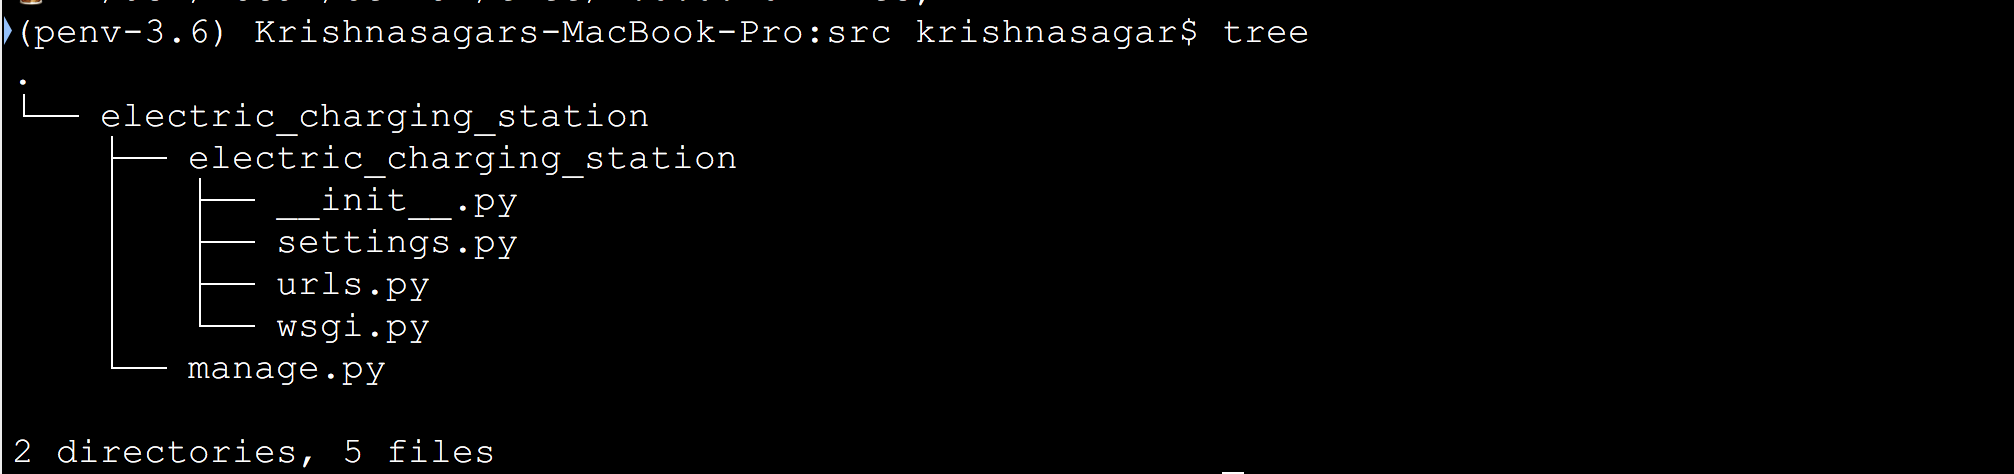
4. Install postgresql server and create user with password as needed
5. create database with sql DDL as: **CREATE DATABASE electric_charging_db;**

# Settings tour and Change settings:

1. We need to change **DATABASES** settings to postgres in **electric_charging_station/electric_charging_station/settings.py**. Check below:
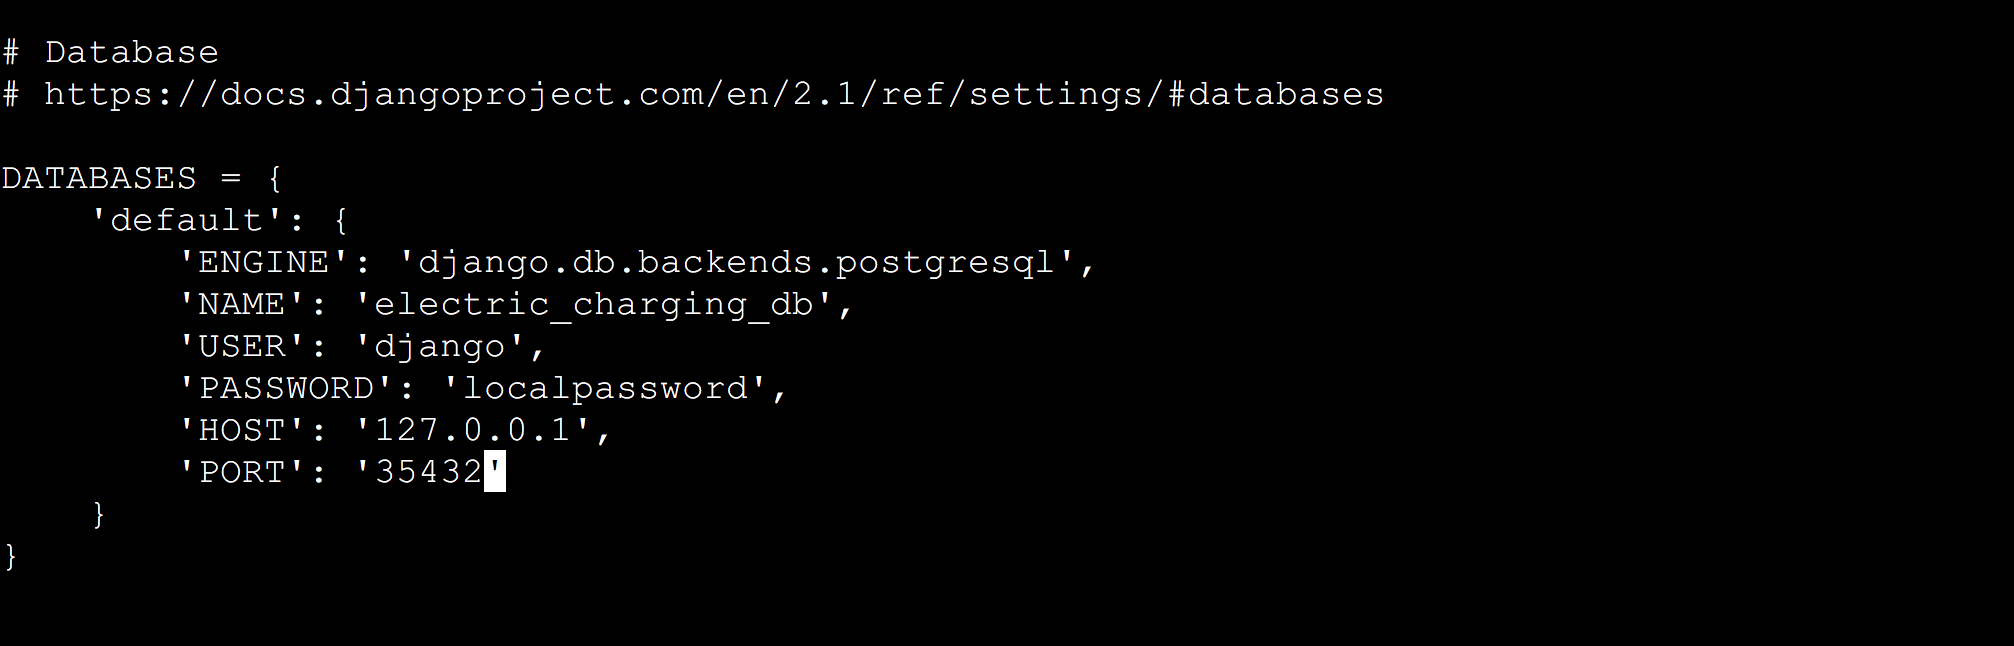
*NOTE: set your settings as per database details. Django Database documentation is the friend.

2. You can check your django application is connected with **./manage.py showmigrations** command. Initially it show as:

In [11]:
management.call_command('showmigrations')

admin
 [ ] 0001_initial
 [ ] 0002_logentry_remove_auto_add
 [ ] 0003_logentry_add_action_flag_choices
auth
 [ ] 0001_initial
 [ ] 0002_alter_permission_name_max_length
 [ ] 0003_alter_user_email_max_length
 [ ] 0004_alter_user_username_opts
 [ ] 0005_alter_user_last_login_null
 [ ] 0006_require_contenttypes_0002
 [ ] 0007_alter_validators_add_error_messages
 [ ] 0008_alter_user_username_max_length
 [ ] 0009_alter_user_last_name_max_length
contenttypes
 [ ] 0001_initial
 [ ] 0002_remove_content_type_name
sessions
 [ ] 0001_initial


# Django management commands tour

Please note that, below slides contain django embedded commands:
    eg: **management.call_command('makemigrations')** which is equivalent to **./manage makemigrations** in the bash shell.

In [16]:

management.execute_from_command_line('h')


Type 'h help <subcommand>' for help on a specific subcommand.

Available subcommands:

[django]
    check
    compilemessages
    createcachetable
    dbshell
    diffsettings
    dumpdata
    flush
    inspectdb
    loaddata
    makemessages
    makemigrations
    migrate
    runserver
    sendtestemail
    shell
    showmigrations
    sqlflush
    sqlmigrate
    sqlsequencereset
    squashmigrations
    startapp
    startproject
    test
    testserver


In [18]:
management.call_command('makemigrations')

No changes detected


In [19]:
management.call_command('migrate')

Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying sessions.0001_initial... OK


In [20]:
management.call_command('showmigrations')

admin
 [X] 0001_initial
 [X] 0002_logentry_remove_auto_add
 [X] 0003_logentry_add_action_flag_choices
auth
 [X] 0001_initial
 [X] 0002_alter_permission_name_max_length
 [X] 0003_alter_user_email_max_length
 [X] 0004_alter_user_username_opts
 [X] 0005_alter_user_last_login_null
 [X] 0006_require_contenttypes_0002
 [X] 0007_alter_validators_add_error_messages
 [X] 0008_alter_user_username_max_length
 [X] 0009_alter_user_last_name_max_length
contenttypes
 [X] 0001_initial
 [X] 0002_remove_content_type_name
sessions
 [X] 0001_initial


# Build Apps:

1. Apps are independent, self-reliable, single responsible.
2. It contains models.py, views.py, tests.py etc. prepopulated - boilerplate via django admin commands

Command for creating new app in project.
**./manage startapp charging_stations**

**NOTE**: **App name need to be plural denoting support of multitude for entity**

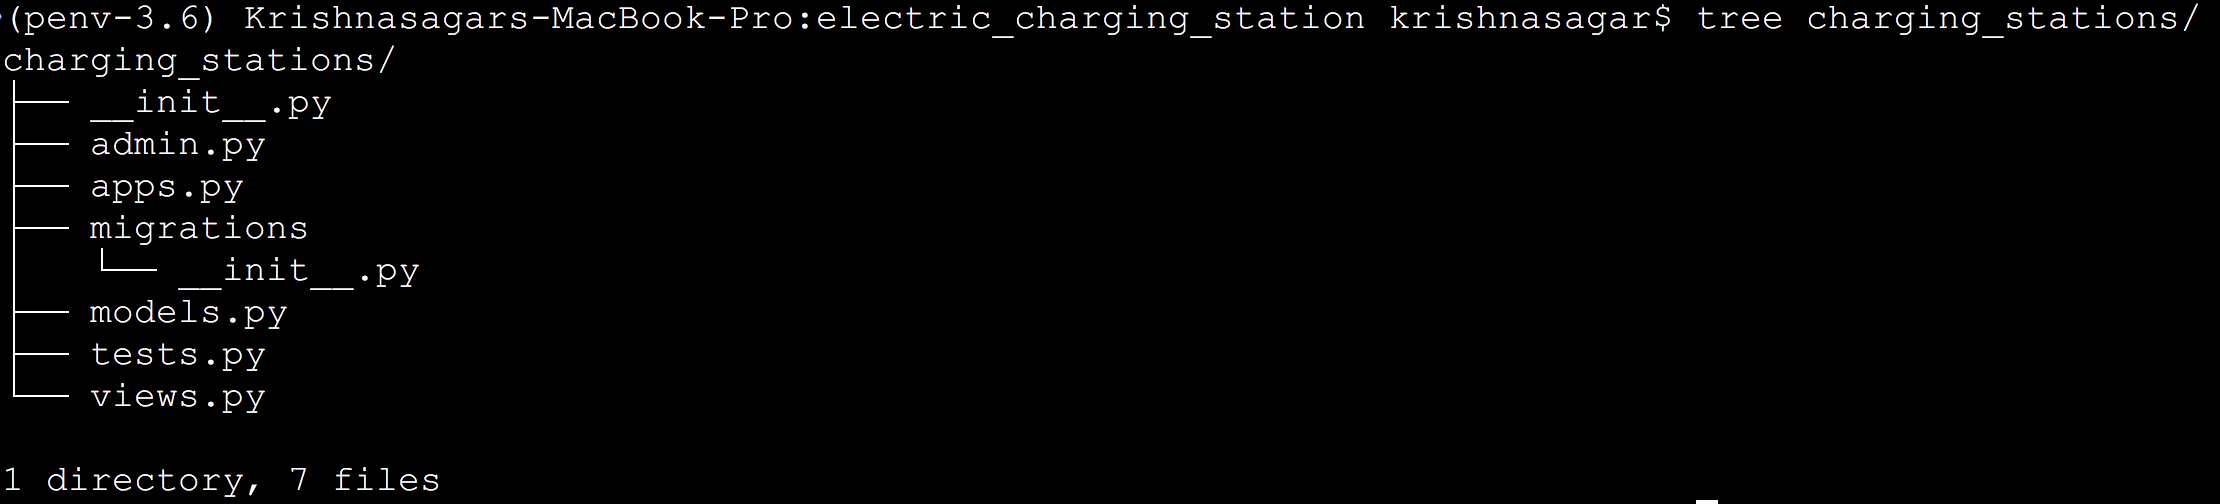

# App - charging_stations

1. Model development:
   - Class based model with fields need to be define.
   - Class name should be singular as it is object represents a row of        table.
   - Class name need to be camel case and field name to be in snake case      eg: CharingStation, parking_fee
   - You can specify indexes, table name, field name in database table,        contraints etc.
   - Model manager - a interface for managing queries and building            model's queryset API eg:             **CharingStation.objects.filter_by_name('abc')**
   - Choices in field give level of abstraction for values stored in DB.

# App - charging_stations

2. Migrations:
    - django_migrations table in the DB.
    - Migration tagging in the same table.
    - Migration sequence
    - To enable migrations add app config in settings.INSTALLED_APPS
    - Migration files shoould be considered for code versioning - github
    - Check via command **./manage.py showmigrations charging_stations**      Shows below output
    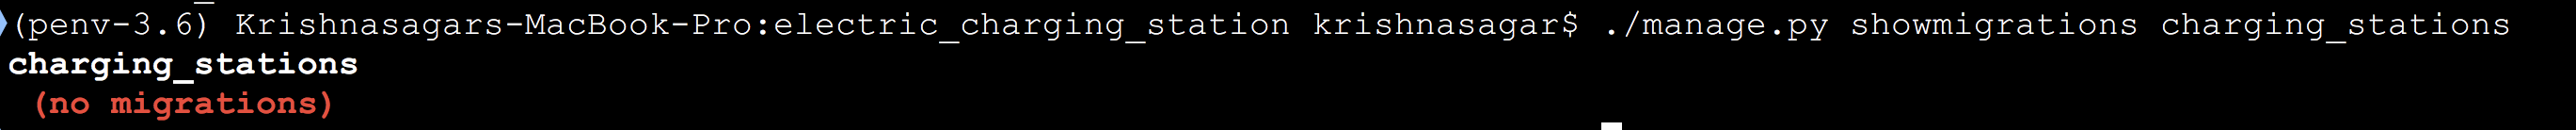
    - Execute: **./manage.py makemigrations charging_stations** - Below output
    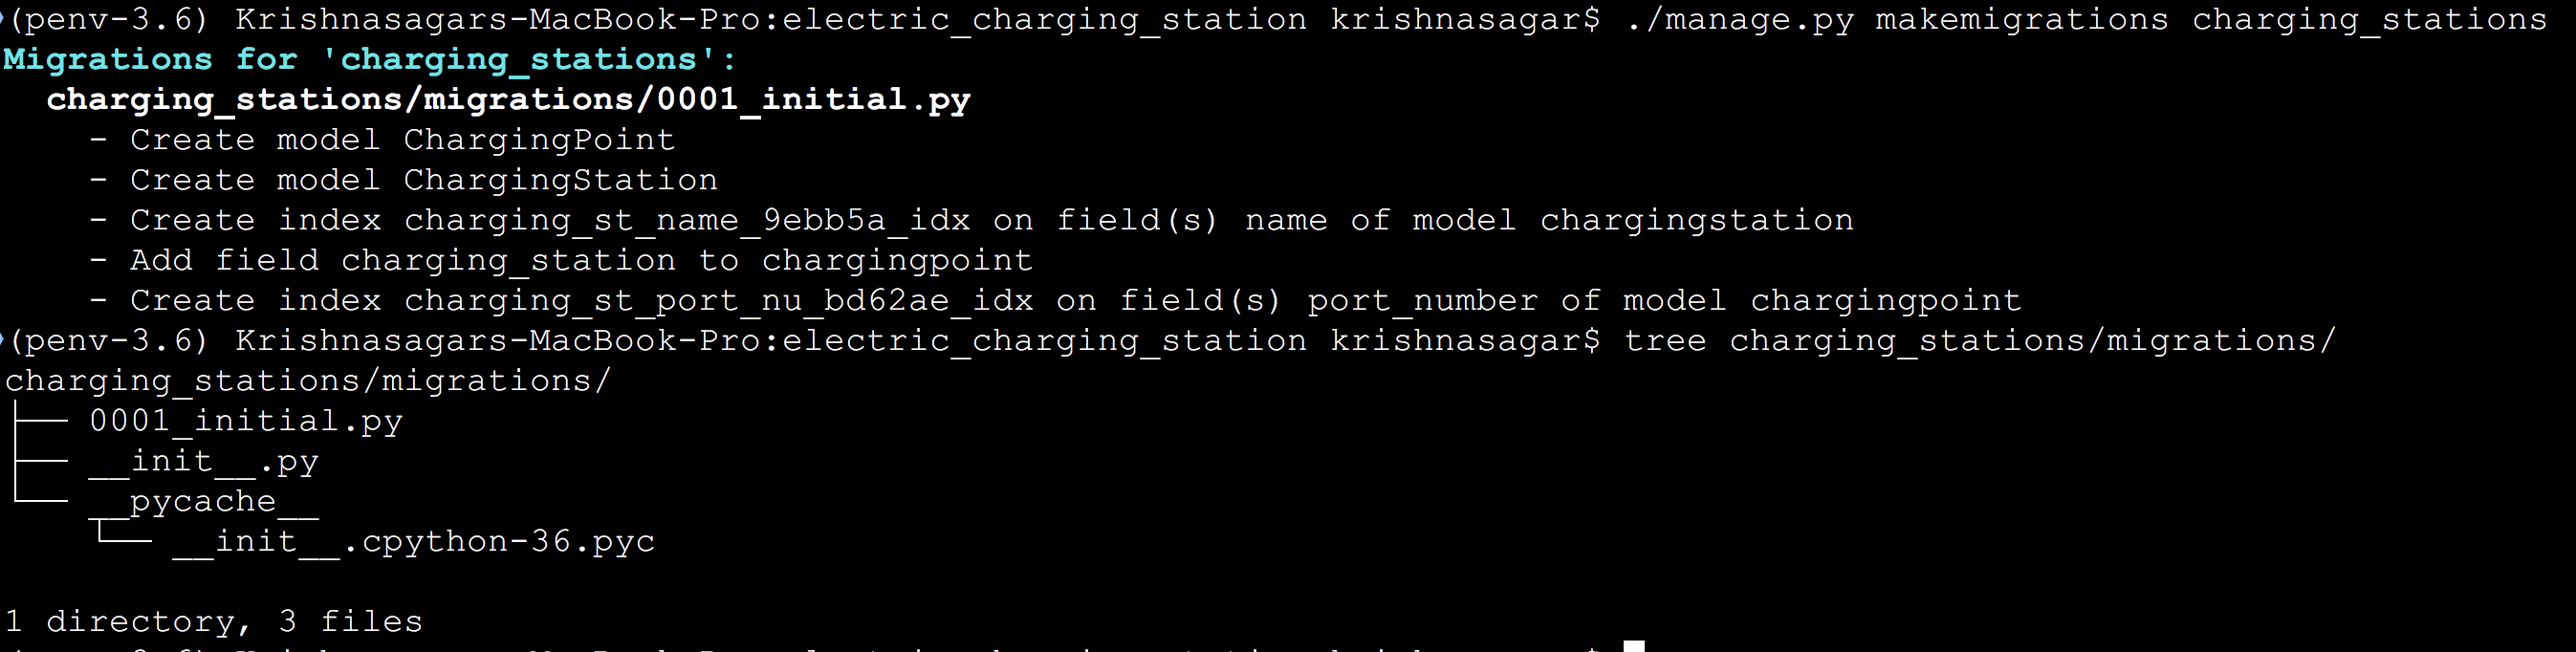
    - Execute: **./manage.py migrate** Here, you can see that only this app's migration are applied
    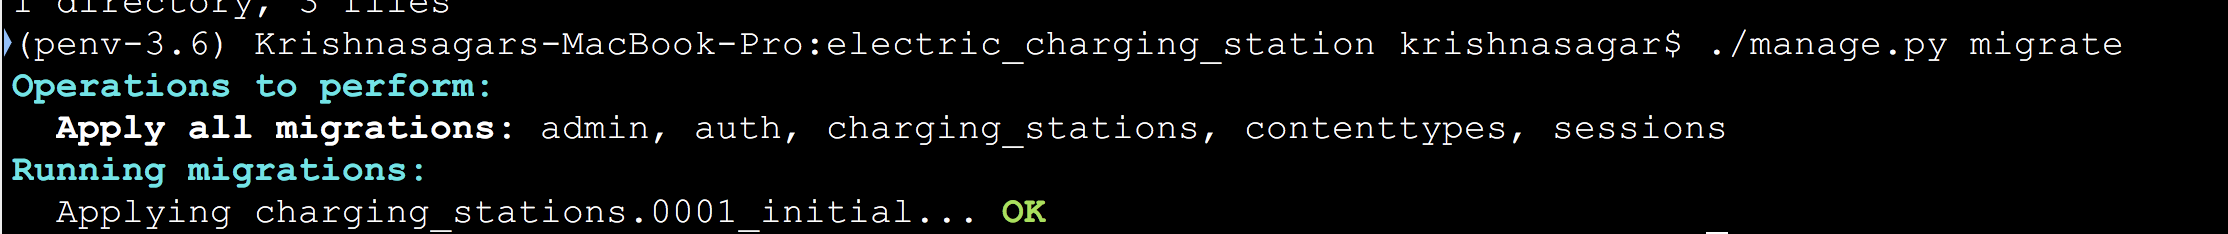

In [2]:
management.call_command('showmigrations')

admin
 [X] 0001_initial
 [X] 0002_logentry_remove_auto_add
 [X] 0003_logentry_add_action_flag_choices
auth
 [X] 0001_initial
 [X] 0002_alter_permission_name_max_length
 [X] 0003_alter_user_email_max_length
 [X] 0004_alter_user_username_opts
 [X] 0005_alter_user_last_login_null
 [X] 0006_require_contenttypes_0002
 [X] 0007_alter_validators_add_error_messages
 [X] 0008_alter_user_username_max_length
 [X] 0009_alter_user_last_name_max_length
charging_stations
 [X] 0001_initial
contenttypes
 [X] 0001_initial
 [X] 0002_remove_content_type_name
sessions
 [X] 0001_initial


# App - charging_stations

3. Model registeration to admin site.
   - Register model class into admin.py of the app
   - Admin is interface to add app models for django admin portal.

# App - charging_stations

4. Queryset - is lazy DB lookup django custom set containing meta info about table and rows. inherits list type 
   
   - Queryset API - create, update, delete, filter, all, order_by, values, values_list, annotate, exists, count etc.
   - Queryset slicing possible.
   - For inner joins, object mapping API - prefetch_related, select_related
   - prefetch_related - many to many, many to one relation
   - select_related - one to many relation
   - values - returns list of rows with field name and column values
   - values_list - returns list of tuple of column values only for all rows.

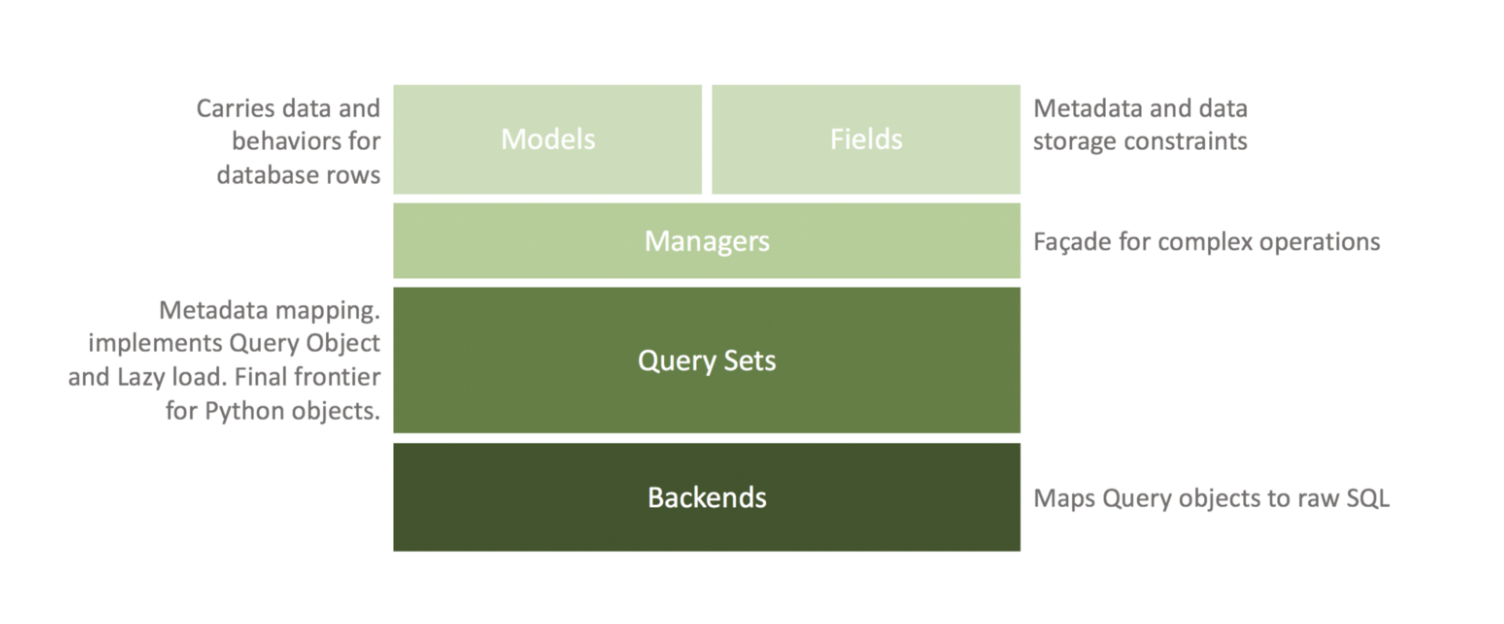

# App - charging_stations

5. Build a view for charging station:
   - Class based view(CBV) and Method based view(MBV)
   - For CBV and MBV, mixins and Python decorators to add more custom logic respectively
   - Django provides TemplateView for CBV.
   - Each view will get request object from dispatch and need to return a render object used ahead for preparing http response.
   - Context is a dict of key and values which can be used to build logic and place needed values in the template and during serving response by django, template gets render with values called using context.

# App - charging_stations

6. Register route to expose view:
   - Routing
   - reverse routing
   - namespace routing
   - How to register route:
     - spec out view in the **electric_charging_station/electric_charging_station/urls.py**
     - eg: **url('charging_stations', charging_stations_views.all_charging_stations, name='charging_stations')**

# App - charging_stations

7. Templates:
   - Templates are intermediate stage of building html pages.
   - governed by template engine. Here, Jinja template engine.
   - Working: render of django passes python context dict to template engine with meta details of actual html file. Engine will process and returns actual html file.
   - How to configure:
     - Change settings in settings.py for **TEMPLATES** - Add correct path of **DIRS** and remove **APPS_DIR**
     - Create **templates** folder in your django root project.
     - Add necessary html template.

# App - charging_stations

8. Static files:
   - Static files are css, js, img, favicon etc.
   - Django contains builtin static finders who finds static over project using BASE_DIR setting.
   - Static files are served by same server/ dedicated server/ some third party content delivery storage.
   - How to configure:
     - Add settings for **STATIC_ROOT = './static/'** in settings.py
     - Add finders in settings.
     - Execute: **./manage.py collectstatic**

In [4]:
management.call_command('collectstatic')


You have requested to collect static files at the destination
location as specified in your settings:

    /Users/krishnasagar/Documents/repos/Django-best-practices/electric_charging_station/static

This will overwrite existing files!
Are you sure you want to do this?

Type 'yes' to continue, or 'no' to cancel: yes

0 static files copied to '/Users/krishnasagar/Documents/repos/Django-best-practices/electric_charging_station/static', 124 unmodified.


"\n0 static files copied to '/Users/krishnasagar/Documents/repos/Django-best-practices/electric_charging_station/static', 124 unmodified.\n"

# App - charging_stations

9. Unit tests:
   - Unit test is test for code block as unit/ code components testing.
   - Django provides unit test API for testing a application close to relality.
   - Based on Python unit test FW.
   - Write tests in tests.py of app.
   - How it works:
     - Django do create test DB with considering applied/ tagged migrations of project.
     - Uses test runner and test executor of Py Unit test FW. (Builtin)
   - Management command - **./manage test <python relative path for tests>**
     - eg: **./manage test charging_stations.tests**
     - eg: **./manage test charging_stations.tests --keepdb**
     - eg: **./manage test charging_stations.tests --parallel 2**
     - eg: **./manage test charging_stations.tests --debug-sql**
     - eg: **./manage test charging_stations.tests --debug-mode**

# How to start project:

1. Django command **./manage runserver**

## Help of runserver command:

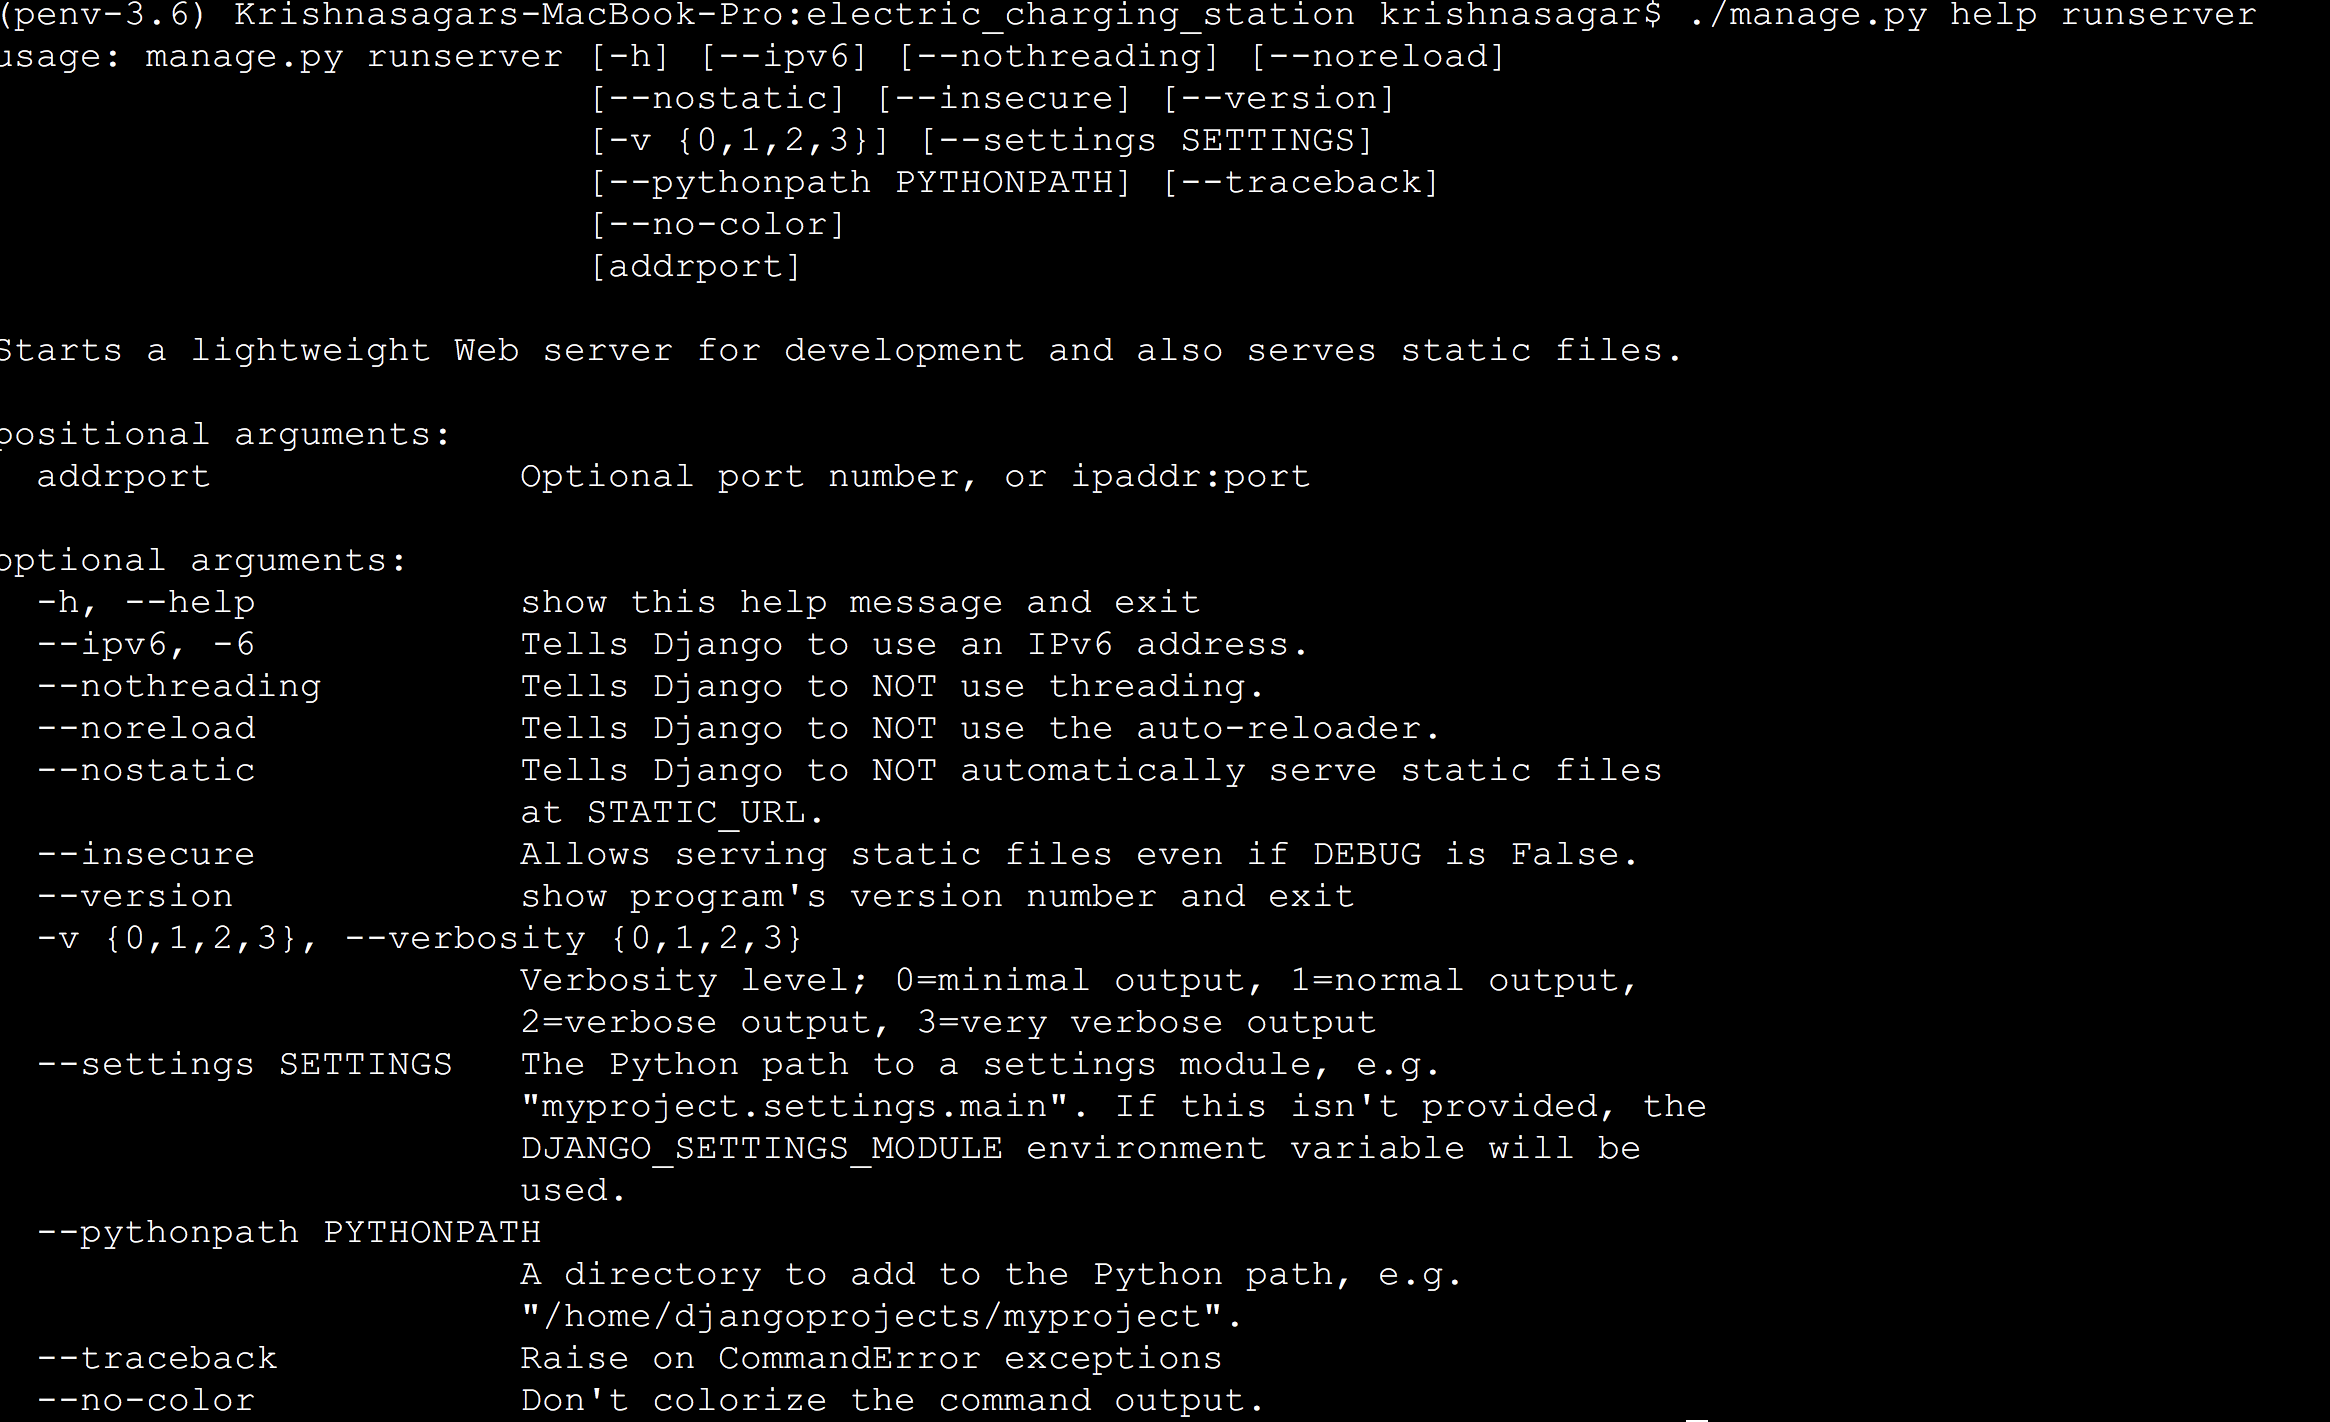

# Django project Admin tour

1. Need to create superuser via: **./manage.py createsuperuser** command eg: username: admin, password: test1234
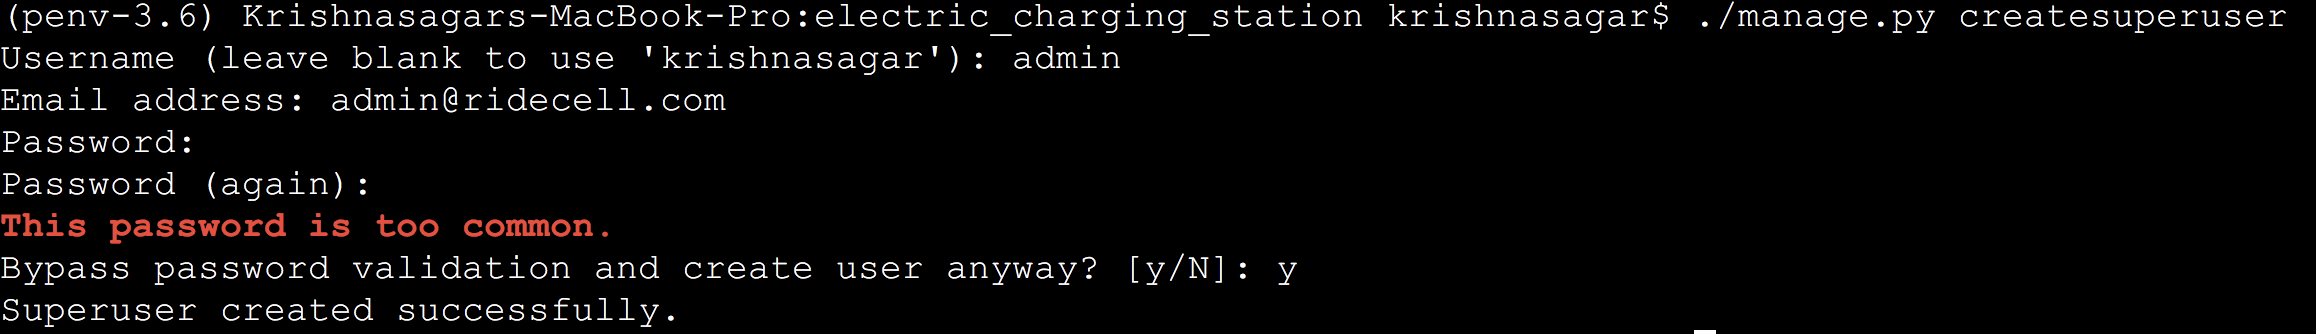
2. Visit, **http://localhost:9000/admin**

 # Limitations:
 
 1. Only horizontal scalable as limitation from multi-threading support of CPython - GIL
 2. Zero downtime is not completely achievable
 3. Forward migrations are easy but backward migrations for reverse are hard for prod - Data loss anxiety
 4. Sometimes code modularity and django features delink a complete business workflow so, hard to comprehend code
 eg: model updates <-> signals <-> notifications/ background task
 5. Less flexibility leads to bad design and vicious circle of hard changes in projects (code break points and expensive code re-write) - leads to more bugs unless code written responsibly using better, viable patterns.
 6. Any feature's workflow stitching in django features incorrectly leads to increased probability for issues and less readable code.
 7. Monolithic

# More on django:

Django Rest Framework - REST API development.

 # Best Practices for django project:
 
 Always follow our backend guidelines for large projects - summon-platform: 
 
 https://ridecell.atlassian.net/wiki/spaces/EN/pages/94295038/Summon-platform+Code+Guidelines
 https://ridecell.atlassian.net/wiki/spaces/ENGSHARED/pages/94433164/Standards+for+URLs
 https://ridecell.atlassian.net/wiki/spaces/ENGSHARED/pages/94432989/API+v3+Specifications
 https://ridecell.atlassian.net/wiki/spaces/EN/pages/94291940/Backend+Logging+Guidelines
 https://ridecell.atlassian.net/wiki/spaces/ENGSHARED/pages/94433083/Django+Style+Guide
 https://ridecell.atlassian.net/wiki/spaces/ENGSHARED/pages/94293961/Django+Migrations+and+Downtime


# Better Practices (Continued..):

Below are specifically for large projects:
 1. Not to follow loose coupling adamantly unless maintainability is not compromised. Resolve case by case.
 2. Less but explicit code - No assumption in the code
 3. DRY and KISS but again follow good design patterns as per case. Bring good from both principles. Its hard !!!
 4. Consistent code patterns across the django apps
 5. Use model as single responsible class via model as object with all necessary domain data computation encapsulated and queryset and queryset manager for database queries
 6. Plan model design based on domain needed - queries and relations definition
 7. Practice of query building of queryset for inspection and checking performance.
 8. Judicious use of performance oriented for filing query on model based on workflows.
 9. Hook settings.DEBUG into code for non-prod environments - useful to check/ profiling parts of code in project easily.
 10. ORM API does not work for all needs in code; sometimes raw sql helps
 11. Product should not depend too much on third party packages/ requirements.

# Helpful resource:

 1. https://django-project-skeleton.readthedocs.io/en/latest/structure.html
 2. https://github.com/wsvincent/awesome-django
 3. https://docs.djangoproject.com/en/dev/internals/contributing/writing-code/coding-style/
 4. https://djangobook.com/mastering-django-2-book/